## Q10

### a.

In [2]:
import numpy as np

# 設定隨機種子以確保結果可重現
np.random.seed(42)

# 每個類別的觀察值數量
n_obs = 20
n_vars = 50

# 生成三個類別的數據，每個類別的數據來自於不同的均值分佈
class_1 = np.random.normal(loc=0, scale=1, size=(n_obs, n_vars))
class_2 = np.random.normal(loc=3, scale=1, size=(n_obs, n_vars))
class_3 = np.random.normal(loc=-3, scale=1, size=(n_obs, n_vars))

# 將三個類別的數據合併
X = np.vstack([class_1, class_2, class_3])
y_true = np.array([0]*n_obs + [1]*n_obs + [2]*n_obs)  # 真實的類別標籤

### b.

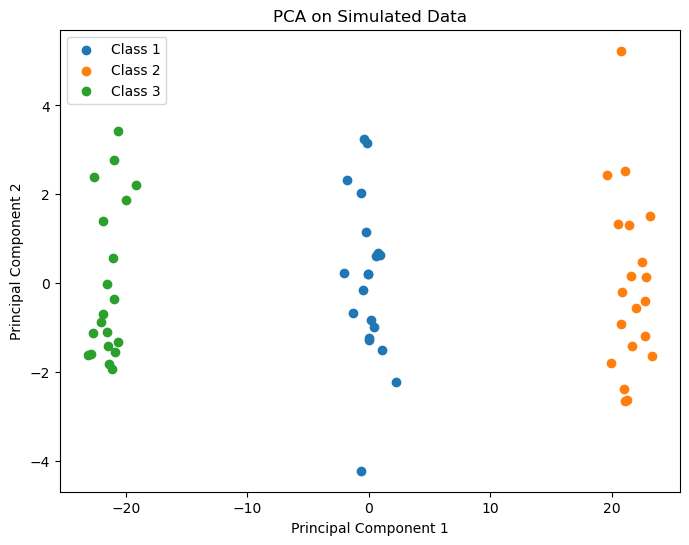

In [3]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 初始化 PCA 模型，並保留前兩個主成分
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 可視化 PCA 結果
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_true == 0, 0], X_pca[y_true == 0, 1], label='Class 1')
plt.scatter(X_pca[y_true == 1, 0], X_pca[y_true == 1, 1], label='Class 2')
plt.scatter(X_pca[y_true == 2, 0], X_pca[y_true == 2, 1], label='Class 3')

plt.title('PCA on Simulated Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### c.

In [8]:
from sklearn.cluster import KMeans
import pandas as pd

# 初始化 K-means 模型並進行聚類（K=3）
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 比較真實的類別標籤和 K-means 聚類的結果
crosstab = pd.crosstab(y_true, y_kmeans, rownames=['True Labels'], colnames=['KMeans Clusters'])
print(crosstab)

KMeans Clusters   0   1   2
True Labels                
0                 0   0  20
1                20   0   0
2                 0  20   0


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


The effectiveness of K-means clustering depends on the data distribution and class separability. If the class differences are clear, the clusters will match the true labels better. By checking the crosstab, we can compare the true labels with the cluster results. Although not always a perfect match, if most data points are correctly assigned, the clustering is considered successful. Using PCA usually improves the clustering results.

### d.

In [9]:
# K-means 聚類（K=2）
kmeans_2 = KMeans(n_clusters=2, random_state=42)
y_kmeans_2 = kmeans_2.fit_predict(X)

# 可視化結果
crosstab_2 = pd.crosstab(y_true, y_kmeans_2, rownames=['True Labels'], colnames=['KMeans Clusters (K=2)'])
print(crosstab_2)

KMeans Clusters (K=2)   0   1
True Labels                  
0                       0  20
1                      20   0
2                       0  20


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


When we apply K-means clustering with K=2, the data is divided into two groups. Since there are actually three classes, K=2 cannot accurately capture all class distinctions. This causes some overlap and misclassification of data points.

### e.

In [10]:
# K-means 聚類（K=4）
kmeans_4 = KMeans(n_clusters=4, random_state=42)
y_kmeans_4 = kmeans_4.fit_predict(X)

# 可視化結果
crosstab_4 = pd.crosstab(y_true, y_kmeans_4, rownames=['True Labels'], colnames=['KMeans Clusters (K=4)'])
print(crosstab_4)

KMeans Clusters (K=4)  0   1   2   3
True Labels                         
0                      0   0  20   0
1                      8   0   0  12
2                      0  20   0   0


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


When applying K-means clustering with K=4, the data is divided into four groups, but there are only three actual classes. As a result, the fourth cluster misclassifies some data points, leading to incorrect groupings and less accurate results.

### f.

In [11]:
# 在 PCA 得分上進行 K-means 聚類
kmeans_pca = KMeans(n_clusters=3, random_state=42)
y_kmeans_pca = kmeans_pca.fit_predict(X_pca)

# 可視化結果
crosstab_pca = pd.crosstab(y_true, y_kmeans_pca, rownames=['True Labels'], colnames=['KMeans on PCA'])
print(crosstab_pca)

KMeans on PCA   0   1   2
True Labels              
0               0   0  20
1              20   0   0
2               0  20   0


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


When performing K-means clustering on the first two principal components, the results are generally better than using the raw data. PCA simplifies the data and highlights the main variations, making the clusters clearer, and K-means can more accurately group the data points.

In this case, K-means clustering with K=3 on the first two principal components should yield results closer to the true class labels, as PCA removes irrelevant noise and dimensions.

### g.

In [13]:
from sklearn.preprocessing import StandardScaler

# 使用 StandardScaler 將數據標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 在標準化後的數據上進行 K-means 聚類（K=3）
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
y_kmeans_scaled = kmeans_scaled.fit_predict(X_scaled)

# 可視化結果
crosstab_scaled = pd.crosstab(y_true, y_kmeans_scaled, rownames=['True Labels'], colnames=['KMeans on Scaled Data'])
print(crosstab_scaled)

KMeans on Scaled Data   0   1   2
True Labels                      
0                       0   0  20
1                      20   0   0
2                       0  20   0


C:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


When using the StandardScaler() to scale the data so that each variable has a mean of zero and a standard deviation of one, K-means clustering typically performs better because the scaling ensures that all features are on the same scale. This helps K-means avoid being biased toward variables with larger ranges. In comparison to the results obtained in (b), where PCA was used to reduce dimensionality, clustering on scaled data may result in better groupings for datasets where the variables have significantly different variances. However, if the key features are already well-represented by the principal components in (b), the clustering might not significantly improve after scaling.

In summary, the use of scaling helps K-means by treating all variables equally, potentially improving clustering accuracy when feature scales differ, but the improvement depends on the nature of the dataset.

## Q2 

### a.

In [15]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [17]:
import statsmodels.api as sm
data = sm.datasets.get_rdataset('USArrests').data

# 進行PCA，並計算前四個主成分載荷向量
pca = PCA(n_components=4)
pca.fit(data)

# 主成分載荷向量
loadings_pca = pca.components_
print("Principal Component Loadings using PCA():")
print(loadings_pca)

Principal Component Loadings using PCA():
[[ 0.04170432  0.99522128  0.04633575  0.0751555 ]
 [ 0.04482166  0.05876003 -0.97685748 -0.20071807]
 [ 0.07989066 -0.06756974 -0.20054629  0.97408059]
 [ 0.99492173 -0.0389383   0.05816914 -0.07232502]]


### b.

In [18]:
# 計算協方差矩陣
cov_matrix = np.cov(data.T)

# 使用 np.linalg.eig() 計算特徵值和特徵向量
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print("Principal Component Loadings using np.linalg.eig():")
print(eig_vectors)

Principal Component Loadings using np.linalg.eig():
[[ 0.04170432  0.04482166 -0.99492173  0.07989066]
 [ 0.99522128  0.05876003  0.0389383  -0.06756974]
 [ 0.04633575 -0.97685748 -0.05816914 -0.20054629]
 [ 0.0751555  -0.20071807  0.07232502  0.97408059]]


### c.

In [20]:
# 使用 np.linalg.svd() 計算
U, S, Vt = np.linalg.svd(data - np.mean(data, axis=0), full_matrices=False)

# 奇異值分解後的 Vt 包含了主成分的載荷向量
print("Principal Component Loadings using np.linalg.svd():")
print(Vt.T)

Principal Component Loadings using np.linalg.svd():
[[ 0.04170432 -0.04482166  0.07989066 -0.99492173]
 [ 0.99522128 -0.05876003 -0.06756974  0.0389383 ]
 [ 0.04633575  0.97685748 -0.20054629 -0.05816914]
 [ 0.0751555   0.20071807  0.97408059  0.07232502]]


### d.

The results from PCA() and np.linalg.svd() should be nearly identical since PCA can be derived from SVD.
The results from np.linalg.eig() may be similar but could differ in terms of signs due to the nature of eigenvectors, which can be multiplied by -1 and still be valid eigenvectors.